# Telco Customer Churn Analysis

Antes de passar para a análise dos dados, é necessário entender o problema. Primeiramente, o que é Churn? De maneira resumida, Churn é a taxa de cancelamento de um serviço ou abandono de clientes.

Entendendo isso, tem algumas perguntas que gostaríamos de responder:

- Qual a taxa de clientes que cancelaram (Churn) e os que continuaram no serviço?
- Em quanto tempo, em média, eles cancelam?
- Qual o serviço que retém mais clientes?
- Qual variável parece ter maior relação com churn?
- Qual é o perfil do cliente que mais cancela?

## Entendendo os Dados

In [160]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# Importando os dados do csv
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
df.shape

(7043, 21)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Pré-Processando os Dados

Podemos dropar a coluna de ID, já que ela não será importante para a análise.

In [138]:
df = df.drop(columns=["customerID"])

Podemos converter TotalCharges para um valor numérico.

In [139]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [140]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Como apenas 11 dados são NaN, podemos preencher esses valores com a média.

In [141]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

## Análise

In [68]:
male = df.loc[df["gender"] == "Male", "Churn"].value_counts(normalize=False)
female = df.loc[df["gender"] == "Female", "Churn"].value_counts(normalize=False)

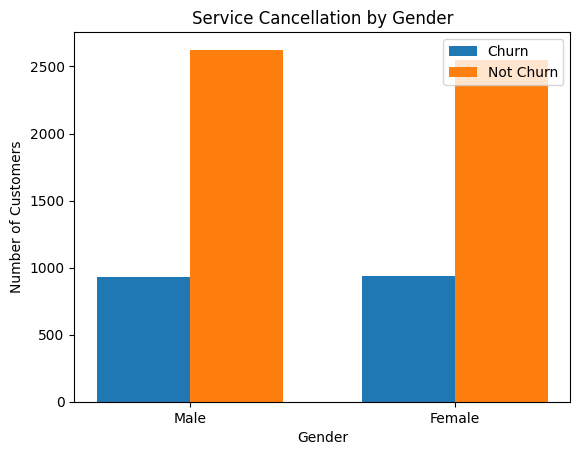

In [100]:
x = np.arange(2)
width = 0.35

plt.figure()
plt.bar(x - width/2, [male["Yes"], female["Yes"]], width, label="Churn")
plt.bar(x + width/2, [male["No"], female["No"]], width, label="Not Churn")

plt.xticks(x, ["Male", "Female"])
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.title('Service Cancellation by Gender')
plt.legend()

plt.show()


O gráfico de barras apresenta a distribuição do churn entre homens e mulheres em valores absolutos. Observa-se que, embora existam pequenas diferenças no número de cancelamentos entre os gêneros, essas variações acompanham proporcionalmente o tamanho de cada grupo.

In [116]:
partner = df.loc[df["Partner"] == "Yes", "Churn"].value_counts(normalize=False)
no_partner = df.loc[df["Partner"] == "No", "Churn"].value_counts(normalize=False)

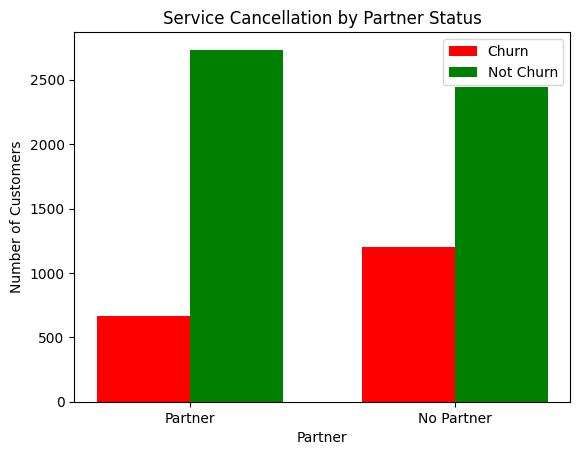

In [125]:
x = np.arange(2)
width = 0.35

plt.figure()
plt.bar(x - width/2, [partner["Yes"], no_partner["Yes"]], width, label="Churn", color='red')
plt.bar(x + width/2, [partner["No"], no_partner["No"]], width, label="Not Churn", color='green')

plt.xticks(x, ["Partner", "No Partner"])
plt.ylabel('Number of Customers')
plt.xlabel('Partner')
plt.title('Service Cancellation by Partner Status')
plt.legend()

plt.show()

Podemos perceber que clientes sem parceiros tendem a cancelar mais o serviço.

In [143]:
dependents = df.loc[df["Dependents"] == "Yes", "Churn"].value_counts(normalize=False)
no_dependents = df.loc[df["Dependents"] == "No", "Churn"].value_counts(normalize=False)

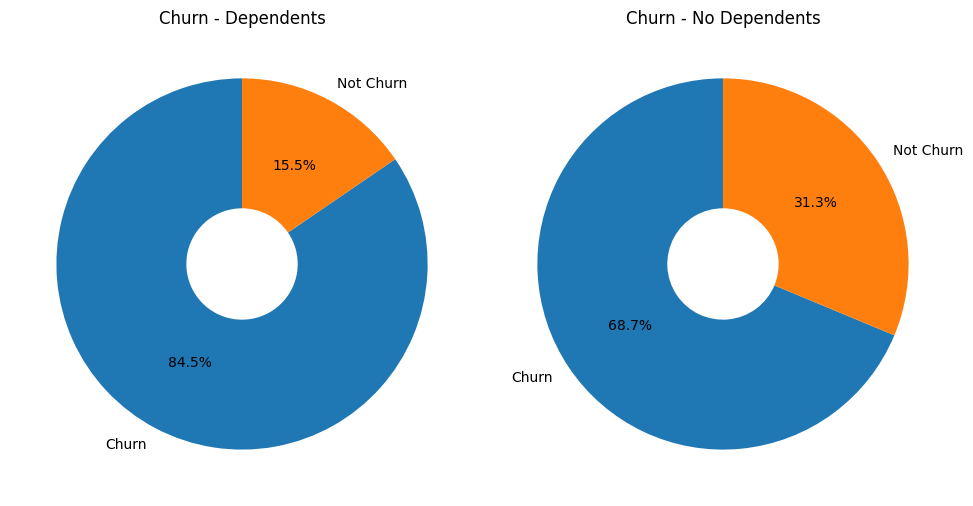

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(
    dependents,
    labels=["Churn", "Not Churn"],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}
)
axes[0].set_title('Churn - Dependents')

axes[1].pie(
    no_dependents,
    labels=["Churn", "Not Churn"],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}
)
axes[1].set_title('Churn - No Dependents')

plt.tight_layout()
plt.show()


Analisando os gráficos, percebe-se que, proporcionalmente, as pessoas que não possuem dependentes cancelam mais do que as que possuem dependentes.

In [179]:
contract = (
    df.groupby("Contract")["Churn"]
    .value_counts()
    .unstack()
)

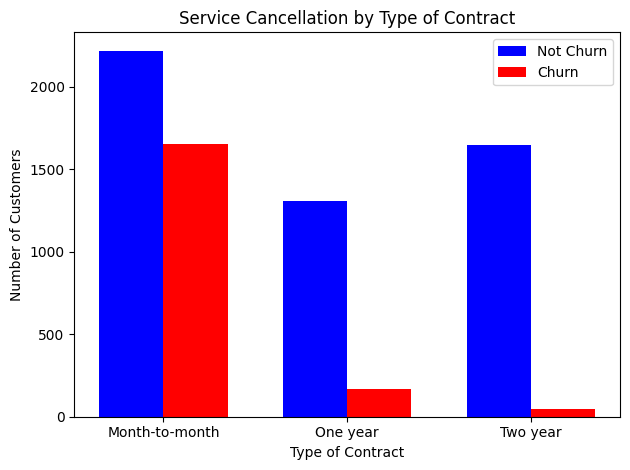

In [189]:
contract_labels = contract.index
no_churn = contract['No']
churn = contract['Yes']


x = np.arange(len(contract))
width = 0.35

plt.figure()
plt.bar(x - width/2, no_churn, width, label='Not Churn', color='blue')
plt.bar(x + width/2, churn, width, label='Churn', color='red')

plt.xticks(x, contract_labels)
plt.xlabel('Type of Contract')
plt.ylabel('Number of Customers')
plt.title('Service Cancellation by Type of Contract')
plt.legend()

plt.tight_layout()
plt.show()

Observa-se que clientes com contrato do tipo mensal apresentam um volume significativamente maior de churn quando comparados aos contratos anuais e bienais, evidenciando que a duração do contrato é um fator fortemente associado ao cancelamento.

In [ ]:
payment_method_labels = df["PaymentMethod"].unique()
payment_methods = df["PaymentMethod"].value_counts()

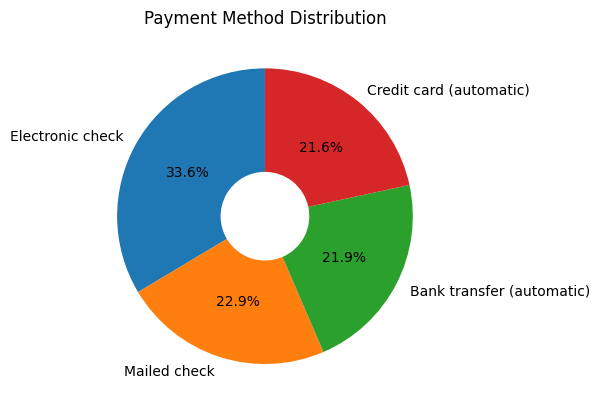

In [201]:
plt.figure()

plt.pie(
    payment_methods,
    labels=payment_method_labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}
)
plt.title('Payment Method Distribution')
plt.show()


A maioria dos pagamentos é realizado por meio de cheque eletrônico (eCheque).

In [202]:
payment_churn = (
    df.groupby("PaymentMethod")["Churn"]
    .value_counts()
    .unstack()
)

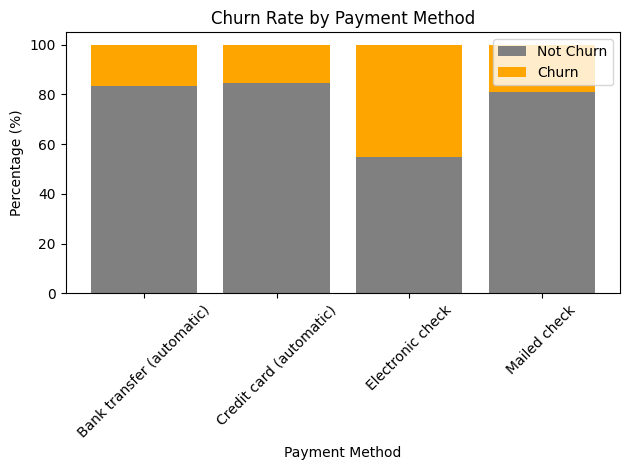

In [220]:
# Porcentagem de churn por método de pagamento
payment_pct = payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100

plt.figure()

plt.bar(payment_pct.index, payment_pct["No"], label="Not Churn", color='gray')
plt.bar(
    payment_pct.index,
    payment_pct["Yes"],
    bottom=payment_pct["No"],
    label="Churn",
    color='orange'
)

plt.xlabel("Payment Method")
plt.ylabel("Percentage (%)")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Clientes que utilizam métodos de pagamento automáticos apresentam maior retenção, enquanto o pagamento via electronic check está associado a maiores taxas de churn.